## EX 08

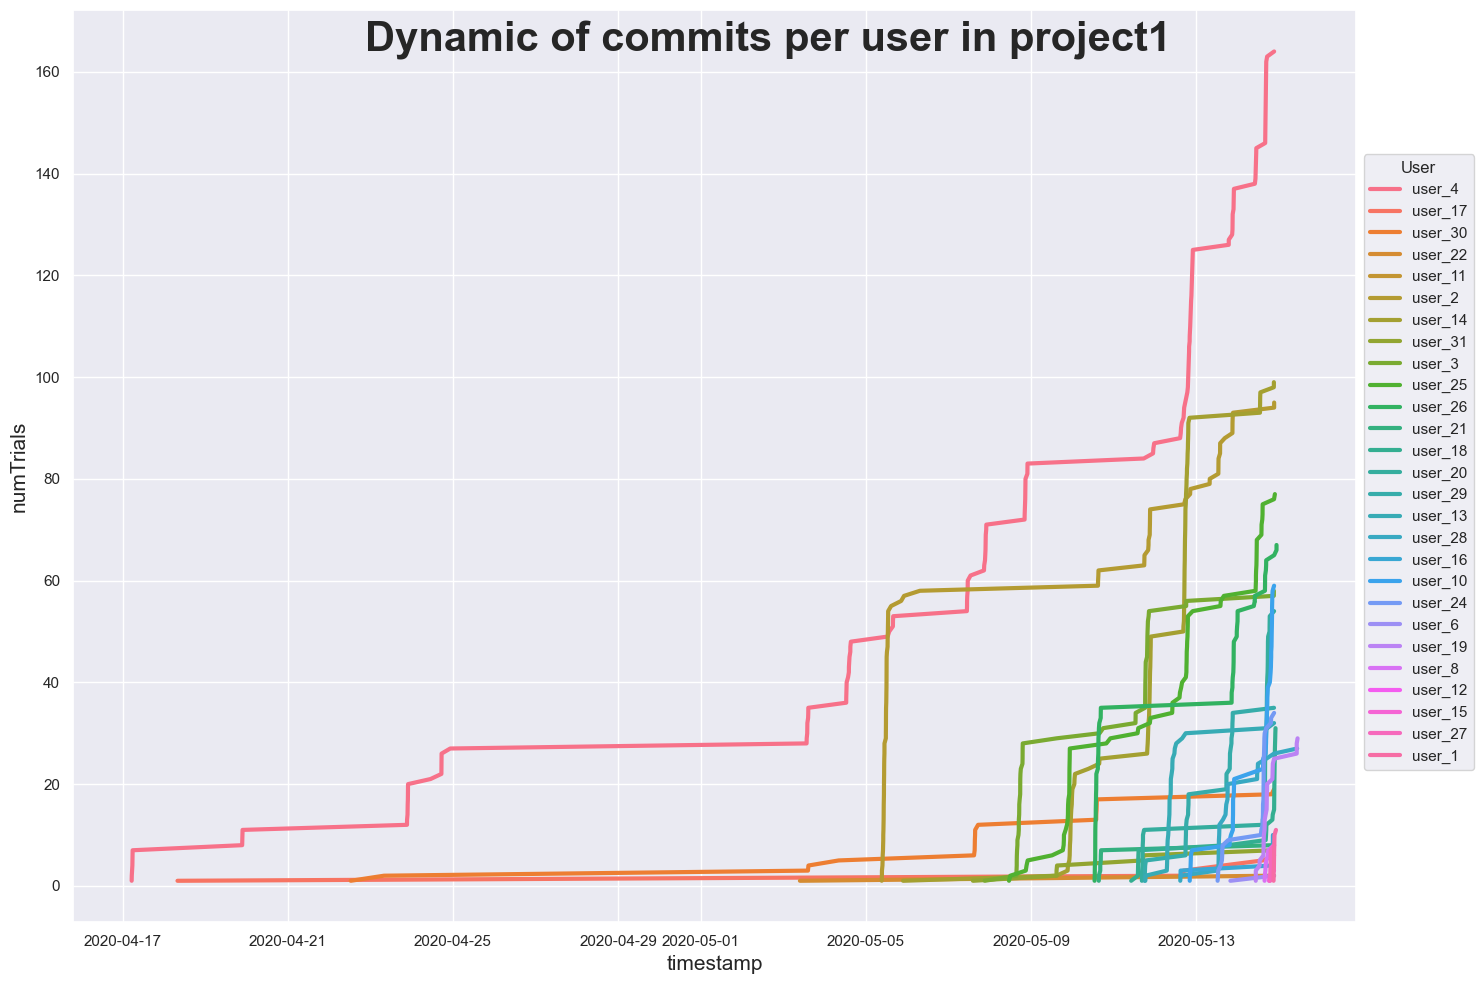

In [3]:
# Импорт необходимых библиотек
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns

# Подключение к базе данных
conn = sqlite3.connect("../data/checking-logs.sqlite")

# Загрузка таблицы checker
df = pd.read_sql("SELECT uid, status, timestamp, numTrials, labname FROM checker", conn)

# Фильтрация по условиям:
# 1. Только пользователи (uid начинается с 'user_')
# 2. Только статус 'ready'
# 3. Только проект 'project1'
df = df[
    df['uid'].str.startswith("user_") &
    (df['status'] == 'ready') &
    (df['labname'] == 'project1')
].copy()

# Преобразование timestamp в datetime
df['timestamp'] = pd.to_datetime(df['timestamp'])

# Группировка по пользователям и времени: считаем суммарное количество попыток коммитов по времени
grouped = df.groupby(['timestamp', 'uid'])['numTrials'].sum().reset_index()

# Создание графика
sns.set(style="darkgrid")  # фон графика серый
plt.figure(figsize=(15, 10))  # ширина = 1.5 * высота

# Линии по каждому пользователю
sns.lineplot(data=grouped, x='timestamp', y='numTrials', hue='uid', linewidth=3)
delta = grouped['timestamp'].max() - grouped['timestamp'].min()

# Настройки графика
plt.text(
    x=grouped['timestamp'].min() + delta * 0.2,  # вместо 0.5
    y=grouped['numTrials'].max(),
    s="Dynamic of commits per user in project1",
    fontsize=30,
    weight='bold'
)
plt.xlabel("timestamp", fontsize=15)
plt.ylabel("numTrials", fontsize=15)
plt.legend(title='User', bbox_to_anchor=(1, 0.85), loc='upper left')  # вынос легенды
plt.tight_layout()
plt.show()

#### “Which user was the leader in the number of commits almost all of the time?”

## The answer: user_4.

#### “Which user was the leader for only a short period of time?”

## The answer: user_2.